In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve,roc_auc_score

In [3]:
df = pd.read_csv(r"D:\csv\Test set.csv")

In [4]:
df

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [6]:
df.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


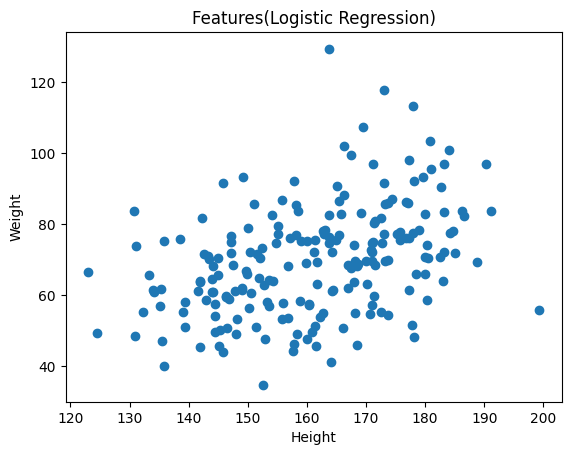

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='o')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Features(Logistic Regression)")
plt.show()

In [8]:
df.shape

(205, 3)

In [9]:
from sklearn.model_selection import train_test_split
X = df[['Height','Weight']]
Y = df['Sex']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=35)

In [10]:
X_train

,Height,Weight
38,152.944765,47.806605
64,163.091394,78.376167
146,168.096226,69.523533
96,175.819637,75.687860
36,149.635809,66.961442
...,...,...
191,171.345320,59.748392
33,182.613128,90.554500
183,177.271074,75.995640
15,147.198452,74.909547


In [11]:
Y_train


38     0
64     1
146    1
96     1
36     0
      ..
191    1
33     1
183    1
15     0
201    1
Name: Sex, Length: 164, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [15]:
model.score(X_test,Y_test)

0.9024390243902439

In [16]:
model.predict_proba(X_test)

array([[5.95058002e-01, 4.04941998e-01],
       [4.01727749e-01, 5.98272251e-01],
       [4.11498449e-04, 9.99588502e-01],
       [5.18858531e-01, 4.81141469e-01],
       [4.14422955e-03, 9.95855770e-01],
       [9.00543524e-01, 9.94564756e-02],
       [9.80173676e-01, 1.98263237e-02],
       [2.46159603e-01, 7.53840397e-01],
       [5.18722509e-01, 4.81277491e-01],
       [5.63962394e-03, 9.94360376e-01],
       [3.19019057e-01, 6.80980943e-01],
       [1.76397112e-02, 9.82360289e-01],
       [9.89060600e-01, 1.09394000e-02],
       [9.23635376e-01, 7.63646241e-02],
       [8.01763218e-01, 1.98236782e-01],
       [9.66621588e-01, 3.33784118e-02],
       [2.46363949e-03, 9.97536361e-01],
       [9.70998139e-01, 2.90018605e-02],
       [1.93584176e-02, 9.80641582e-01],
       [1.12564494e-01, 8.87435506e-01],
       [1.38600540e-01, 8.61399460e-01],
       [2.56613605e-02, 9.74338639e-01],
       [6.00858404e-02, 9.39914160e-01],
       [5.45971529e-01, 4.54028471e-01],
       [9.791434

In [17]:
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_pred)

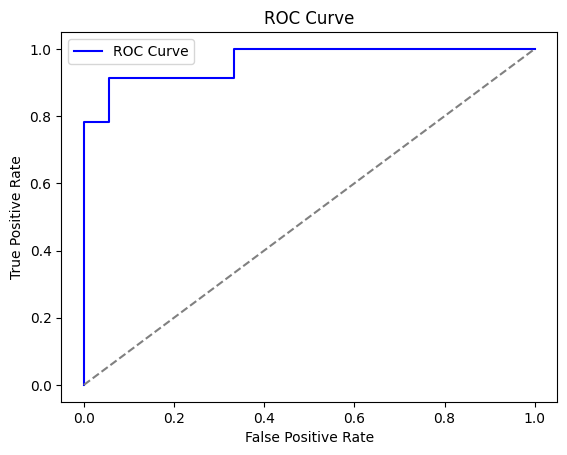

In [18]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [19]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC Score:", auc)

AUC Score: 0.963768115942029
